Importing libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.decomposition import PCA

Importing Dataset

In [183]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [144]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [145]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [146]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Ploting data

<Axes: xlabel='Glucose', ylabel='BMI'>

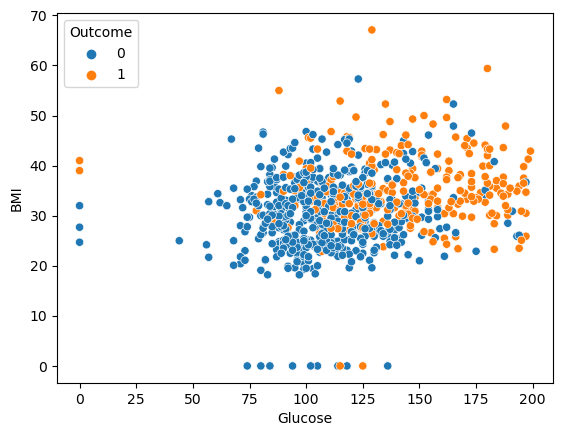

In [147]:
sns.scatterplot(x='Glucose',y = 'BMI' ,data = diabetes_dataset, hue = 'Outcome') 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

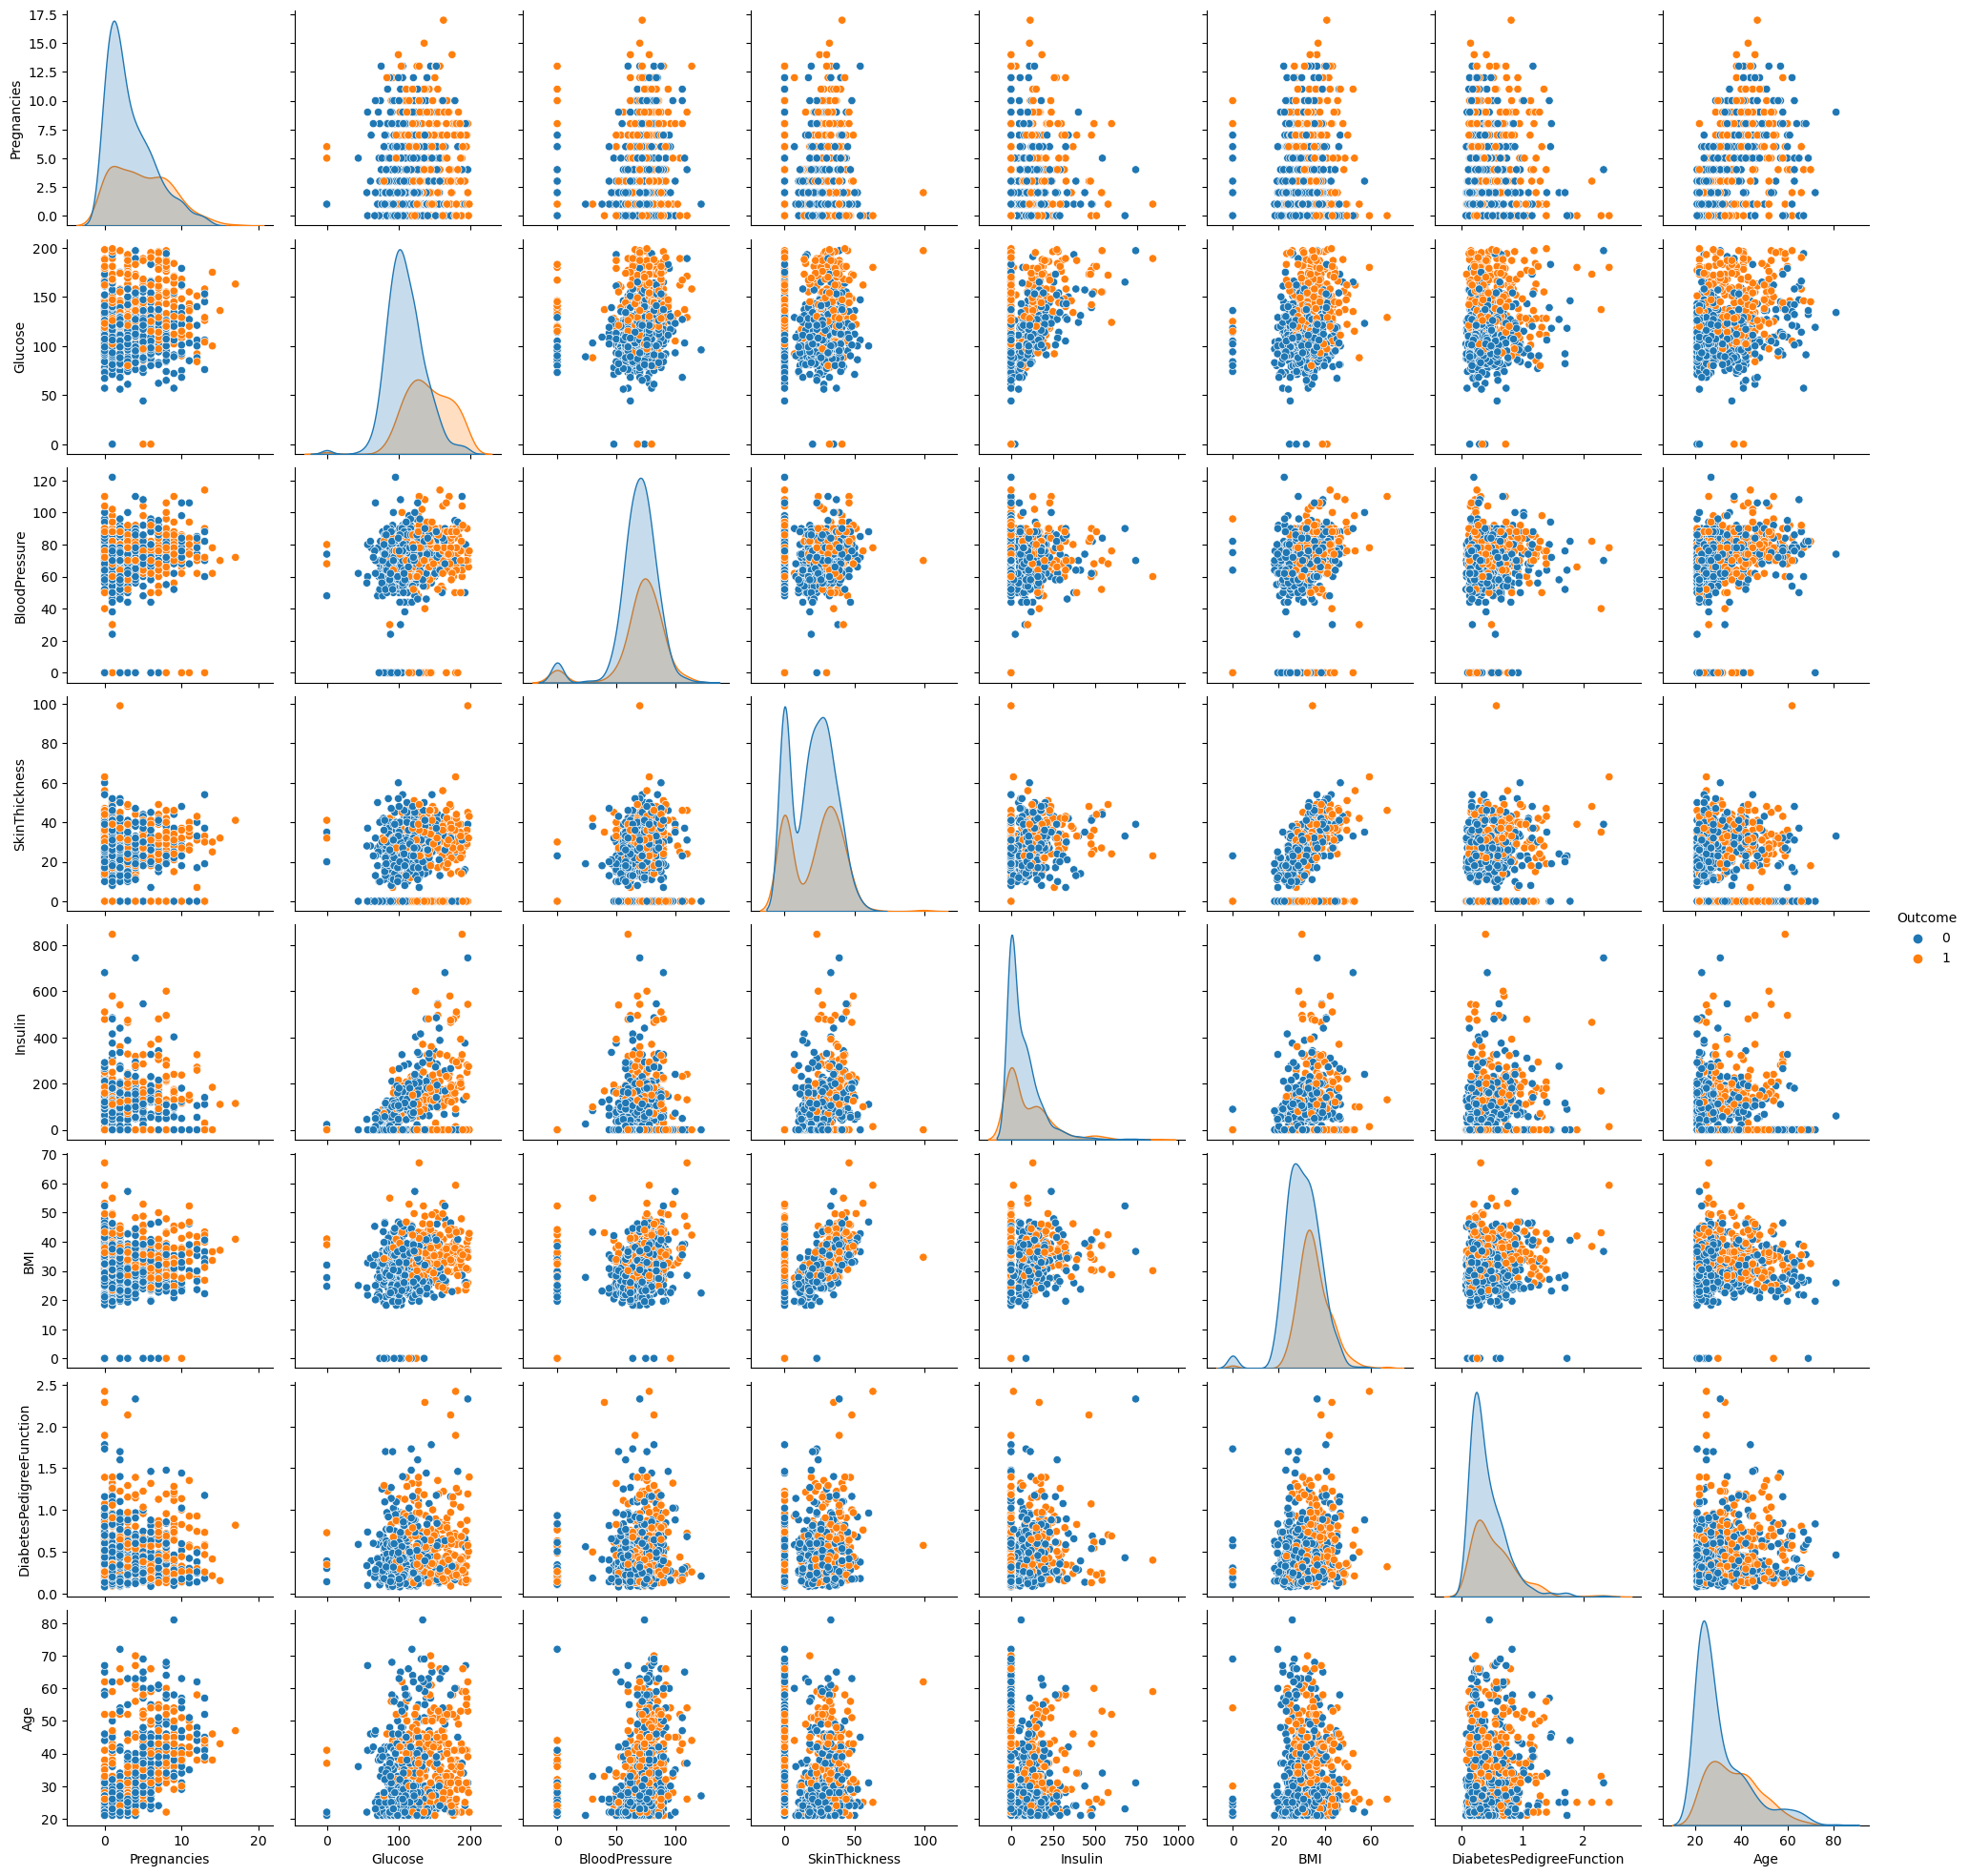

In [148]:
sns.pairplot(diabetes_dataset, hue='Outcome', diag_kind="kde")

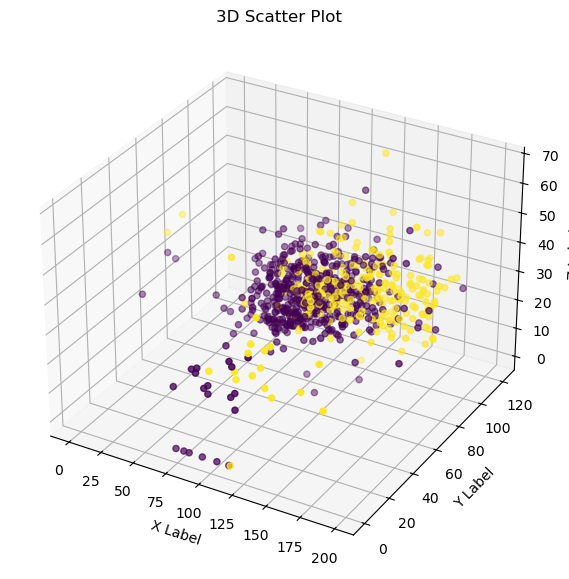

In [188]:
#3d plot
a = diabetes_dataset['Glucose']
b = diabetes_dataset['BloodPressure']
c = diabetes_dataset['BMI']
outcome = diabetes_dataset['Outcome']
# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(a, b, c, c=outcome,cmap='viridis')

# Adding labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Adding a color bar


# Title
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


Seperating dataset

In [150]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [151]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [152]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Ploting pca 

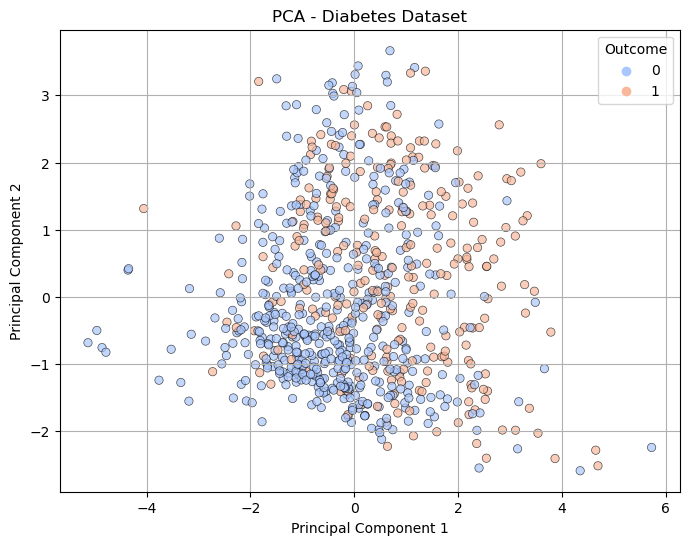

In [153]:
# Step 1: Standardize the data
scaler_pca = StandardScaler()
scaled_data = scaler_pca.fit_transform(X)

# Step 2: Perform PCA 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Plot the first two principal components with different colors for each outcome class
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=Y, palette='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA - Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Support Vector Machine transformation and training

In [154]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [155]:
standardized_data = scaler.transform(X)

In [156]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [157]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [159]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Linear kernel

In [160]:
classifier_linear = svm.SVC(kernel='linear')

In [189]:
# training the support vector Machine Classifier
classifier_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [162]:
# accuracy score on the training data
X_train_prediction_linear = classifier_linear.predict(X_train)
training_data_accuracy_linear = accuracy_score(X_train_prediction_linear, Y_train)

In [163]:
print('Accuracy score of the training data using linear kernel : ', training_data_accuracy_linear*100,'%')

Accuracy score of the training data using linear kernel :  78.66449511400651 %


In [164]:
# accuracy score on the test data
X_test_prediction_linear = classifier_linear.predict(X_test)
test_data_accuracy_linear = accuracy_score(X_test_prediction_linear, Y_test)

In [165]:
print('Accuracy score of the test data using linear kernel: ', test_data_accuracy_linear*100,'%')

Accuracy score of the test data using linear kernel:  77.27272727272727 %


poly kernel

In [166]:
classifier_poly = svm.SVC(kernel='poly')
#training the support vector Machine Classifier
classifier_poly.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction_poly = classifier_poly.predict(X_train)
training_data_accuracy_poly = accuracy_score(X_train_prediction_poly, Y_train)
print('Accuracy score of the training data using poly kernel : ', training_data_accuracy_poly*100,'%')
# accuracy score on the test data
X_test_prediction_poly = classifier_poly.predict(X_test)
test_data_accuracy_poly = accuracy_score(X_test_prediction_poly, Y_test)
print('Accuracy score of the test data using poly kernel : ', test_data_accuracy_poly*100,'%')

Accuracy score of the training data using poly kernel :  80.29315960912052 %
Accuracy score of the test data using poly kernel :  70.77922077922078 %


rbf kernel

In [167]:
classifier_rbf = svm.SVC(kernel='rbf')
#training the support vector Machine Classifier
classifier_rbf.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction_rbf = classifier_rbf.predict(X_train)
training_data_accuracy_rbf = accuracy_score(X_train_prediction_rbf, Y_train)
print('Accuracy score of the training data using rbf kernel : ', training_data_accuracy_rbf*100,'%')
# accuracy score on the test data
X_test_prediction_rbf = classifier_rbf.predict(X_test)
test_data_accuracy_rbf = accuracy_score(X_test_prediction_rbf, Y_test)
print('Accuracy score of the test data using rbf kernel: ', test_data_accuracy_rbf*100,'%')

Accuracy score of the training data using rbf kernel :  82.89902280130293 %
Accuracy score of the test data using rbf kernel:  72.72727272727273 %


sigmoid kernel

In [168]:
classifier_sigmoid = svm.SVC(kernel='sigmoid')
#training the support vector Machine Classifier
classifier_sigmoid.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction_sigmoid = classifier_sigmoid.predict(X_train)
training_data_accuracy_sigmoid = accuracy_score(X_train_prediction_sigmoid, Y_train)
print('Accuracy score of the training data using sigmoid kernel : ', training_data_accuracy_sigmoid*100,'%')
# accuracy score on the test data
X_test_prediction_sigmoid = classifier_sigmoid.predict(X_test)
test_data_accuracy_sigmoid = accuracy_score(X_test_prediction_sigmoid, Y_test)
print('Accuracy score of the test data using sigmoid kernel : ', test_data_accuracy_sigmoid*100,'%')

Accuracy score of the training data using sigmoid kernel :  71.00977198697068 %
Accuracy score of the test data using sigmoid kernel :  75.32467532467533 %


confusion matrix for all kernel

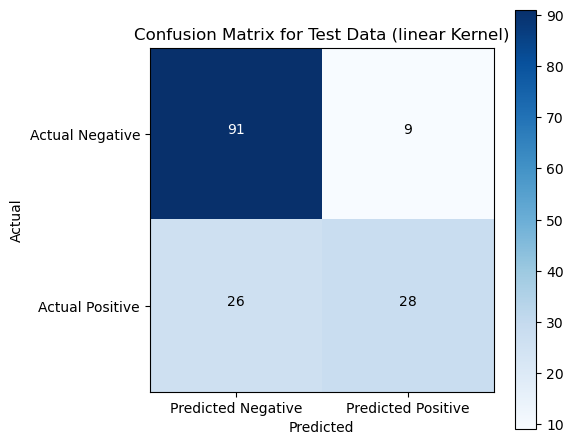

F1 Score: 0.62


In [202]:
# Confusion matrix for test data
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction_linear)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data (linear Kernel)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Annotating the confusion matrix with the values
thresh = conf_matrix_test.max() / 2.
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_test[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate F1 score
f1 = f1_score(Y_test, X_test_prediction_linear)
print(f"F1 Score: {f1:.2f}")


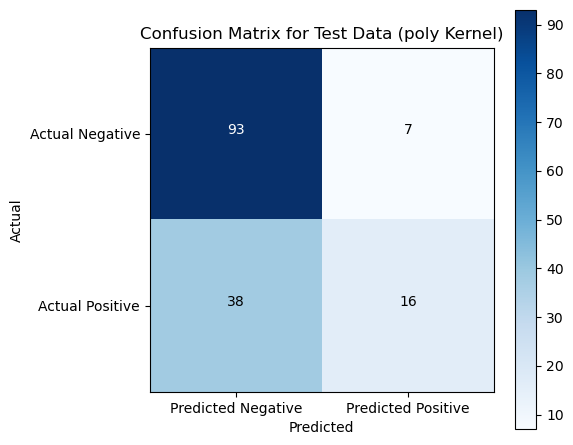

F1 Score: 0.42


In [203]:
# Confusion matrix for test data
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction_poly)

# Plotting the confusion matrix 
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data (poly Kernel)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Annotating the confusion matrix with the values
thresh = conf_matrix_test.max() / 2.
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_test[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate the F1 score
f1 = f1_score(Y_test, X_test_prediction_poly)
print(f"F1 Score: {f1:.2f}")


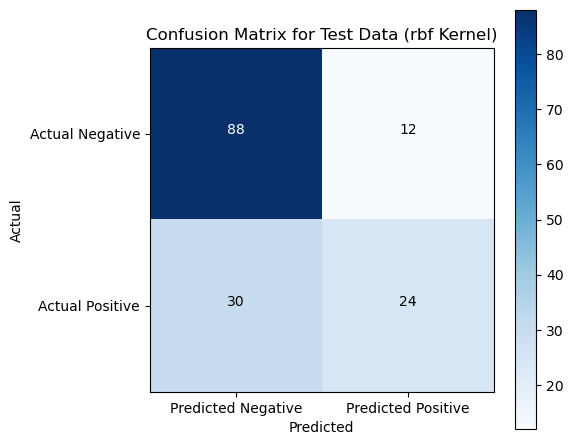

F1 Score: 0.53


In [205]:
# Confusion matrix for test data
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction_rbf)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data (rbf Kernel)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Annotating the confusion matrix with the values
thresh = conf_matrix_test.max() / 2.
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_test[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate the F1 score for the rbf kernel predictions
f1 = f1_score(Y_test, X_test_prediction_rbf)
print(f"F1 Score: {f1:.2f}")

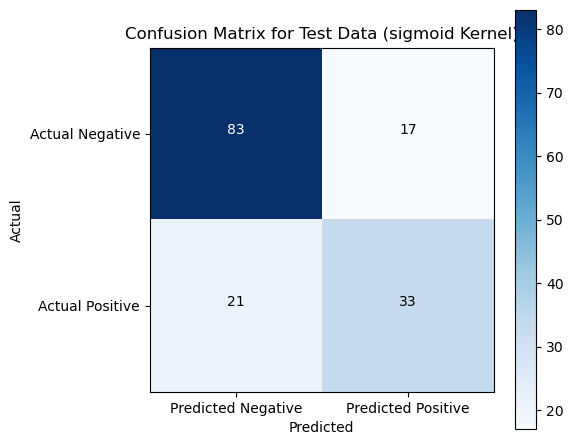

F1 Score: 0.63


In [206]:
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction_sigmoid)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data (sigmoid Kernel)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Annotating the confusion matrix with the values
thresh = conf_matrix_test.max() / 2.
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_test[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate the F1 score for the sigmoid kernel predictions
f1 = f1_score(Y_test, X_test_prediction_sigmoid)
print(f"F1 Score: {f1:.2f}")

testing with own data

In [170]:
input_data_1 = (3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data_1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier_linear.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.16245612 -0.34159367 -0.04763786 -0.05472762 -0.0955768  -0.21428768
  -0.12727475 -0.17450523]]
[0]
The person is not diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [171]:
input_data_2 = (4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data_2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier_linear.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0.30308989 0.63730163 0.08887661 0.10210376 0.17831492 0.3997904
  0.2374529  0.32556945]]
[1]
The person is diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [198]:
input_data_3 = (15,50,100,20,400,20,1,30)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data_3)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier_linear.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 3.31264542 -2.21879645  1.59717775 -0.03365099  2.7802678  -1.52208897
   1.59499624 -0.27575966]]
[0]
The person is not diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
